In [1]:
import scipy.interpolate as spl
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import scipy.integrate as spint
from scipy.optimize import curve_fit
import csv
import BayesLineFit_mod as blf

# Silk-Elmegreen (Boissier SFL) fitting

In [2]:
directory3 = "allSFRprofs/"

new_header_line = "R[kpc] Vrot[km/s] e_Vrot[km/s] Sigma_gas[Msun/kpc2] e_Sigma_gas[Msun/kpc2] Sigma_SFR[Msun/yr/kpc2] e_Sigma_SFR[Msun/yr/kpc2]\n"

for filename in os.listdir(directory3):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory3, filename)

        with open(filepath, 'r') as file:
            lines = file.readlines()
        
        if lines[0].startswith('#'):
            lines[:8] = [new_header_line]

        with open(filepath, 'w') as file:
            file.writelines(lines)

In [3]:
i = 0

r_sesfl = []
v_sesfl = []
v_err_sesfl = []
sigma_gas_sesfl = []
sigma_gas_err_sesfl = []
sigma_sfr_sesfl = []
sigma_sfr_err_sesfl = []

for filename in os.listdir(directory3):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory3, filename)
        galaxy = os.path.splitext(filename)[0].split('_')[0]
        #if galaxy != "NGC5055":
        print(galaxy)
        df5 = pd.read_table(filepath, sep=" ", usecols=["R[kpc]", "Vrot[km/s]", "e_Vrot[km/s]", "Sigma_gas[Msun/kpc2]", "e_Sigma_gas[Msun/kpc2]", "Sigma_SFR[Msun/yr/kpc2]", "e_Sigma_SFR[Msun/yr/kpc2]"])

        r_sesfl.extend(pd.to_numeric(df5['R[kpc]'], errors='coerce').tolist())
        v_sesfl.extend(pd.to_numeric(df5['Vrot[km/s]'], errors='coerce').tolist())
        v_err_sesfl.extend(pd.to_numeric(df5['e_Vrot[km/s]'], errors='coerce').tolist())
        sigma_gas_sesfl.extend(pd.to_numeric(df5['Sigma_gas[Msun/kpc2]'], errors='coerce').tolist())
        sigma_gas_err_sesfl.extend(pd.to_numeric(df5['e_Sigma_gas[Msun/kpc2]'], errors='coerce').tolist())
        sigma_sfr_sesfl.extend(pd.to_numeric(df5['Sigma_SFR[Msun/yr/kpc2]'], errors='coerce').tolist())
        sigma_sfr_err_sesfl.extend(pd.to_numeric(df5['e_Sigma_SFR[Msun/yr/kpc2]'], errors='coerce').tolist())

        i+=1

print(i)

r_sesfl = np.array(r_sesfl)
v_sesfl = np.array(v_sesfl)
v_err_sesfl = np.array(v_err_sesfl)
sigma_gas_sesfl = np.array(sigma_gas_sesfl)
sigma_gas_err_sesfl = np.array(sigma_gas_err_sesfl)
sigma_sfr_sesfl = np.array(sigma_sfr_sesfl)
sigma_sfr_err_sesfl = np.array(sigma_sfr_err_sesfl)

omega_sesfl = (v_sesfl/r_sesfl)*1.022e-9
omega_err_sesfl = (v_err_sesfl/r_sesfl)*1.022e-9

NGC7331
DDO87
DDO101
DDO47
NGC5055
NGC3198
NGC0925
NGC2403
DDO126
DDO154
NGC6946
NGC7793
NGC2366
DDO133
WLM
DDO50
NGC2841
IC2574
DDO168
NGC2976
NGC4736
DDO52
22


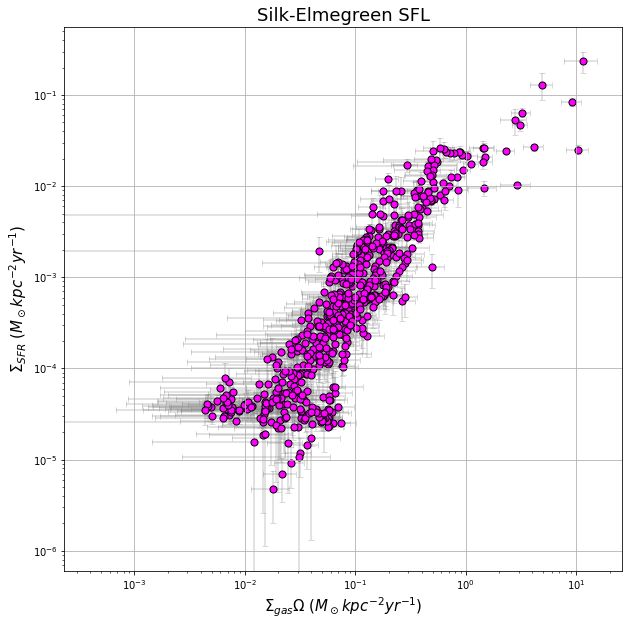

In [4]:
fig = figure(figsize=(10,10), facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.scatter(sigma_gas_sesfl*omega_sesfl, sigma_sfr_sesfl, color="magenta", edgecolor='k', s=50)
frame.errorbar(sigma_gas_sesfl*omega_sesfl, sigma_sfr_sesfl, xerr=sigma_gas_sesfl*omega_sesfl*np.sqrt((sigma_gas_err_sesfl/sigma_gas_sesfl)**2 + (omega_err_sesfl/omega_sesfl)**2), yerr=sigma_sfr_err_sesfl, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3, zorder=0)
frame.set_xscale('log')
frame.set_yscale('log')
frame.set_title(r"Silk-Elmegreen SFL", fontsize = 18)
frame.set_xlabel(r"$\Sigma_{gas}\Omega$ $(M_\odot kpc^{-2} yr^{-1})$", fontsize = 15)
frame.set_ylabel(r"$\Sigma_{SFR}$ $(M_\odot kpc^{-2} yr^{-1})$", fontsize = 15)
frame.grid()
show()

In [5]:
#First masking

mask1 = np.isnan(sigma_sfr_sesfl)
masked_sigma_sfr_sesfl = sigma_sfr_sesfl[~mask1]*1e-6 #turn it from kpc^-2 to pc^-2
masked_sigma_sfr_err_sesfl = sigma_sfr_err_sesfl[~mask1]*1e-6
masked_sigma_gas_sesfl = sigma_gas_sesfl[~mask1]*1e-6
masked_sigma_gas_err_sesfl = sigma_gas_err_sesfl[~mask1]*1e-6
masked_omega_sesfl = omega_sesfl[~mask1]
masked_omega_err_sesfl = omega_err_sesfl[~mask1]

# Second masking

mask2 = np.where(masked_sigma_sfr_sesfl != 0)[0]
masked_sigma_sfr_sesfl = masked_sigma_sfr_sesfl[mask2]
masked_sigma_sfr_err_sesfl = masked_sigma_sfr_err_sesfl[mask2]
masked_sigma_gas_sesfl = masked_sigma_gas_sesfl[mask2]
masked_sigma_gas_err_sesfl = masked_sigma_gas_err_sesfl[mask2]
masked_omega_sesfl = masked_omega_sesfl[mask2]
masked_omega_err_sesfl = masked_omega_err_sesfl[mask2]

# Third masking

mask3 = np.where(masked_sigma_sfr_err_sesfl != 0)[0]
masked_sigma_sfr_sesfl = masked_sigma_sfr_sesfl[mask3]
masked_sigma_sfr_err_sesfl = masked_sigma_sfr_err_sesfl[mask3]
masked_sigma_gas_sesfl = masked_sigma_gas_sesfl[mask3]
masked_sigma_gas_err_sesfl = masked_sigma_gas_err_sesfl[mask3]
masked_omega_sesfl = masked_omega_sesfl[mask3]
masked_omega_err_sesfl = masked_omega_err_sesfl[mask3]

In [6]:
def fit_se(x, a, n):
    return a * (x**n)

x_combined = np.array([masked_sigma_gas_sesfl, masked_omega_sesfl])

popt, pcov = curve_fit(fit_se, masked_sigma_gas_sesfl, masked_sigma_sfr_sesfl/masked_omega_sesfl, p0=[4.5e-6, 2])
#, sigma=(masked_sigma_sfr_sesfl/masked_omega_sesfl*np.sqrt((masked_sigma_sfr_err_sesfl/masked_sigma_sfr_sesfl)**2 + (masked_omega_err_sesfl/masked_omega_sesfl)**2))
a_sesfl, n_sesfl = popt
print(a_sesfl, n_sesfl)

0.005820375637094799 1.4188605438496786


In [7]:
NGC5055 = pd.read_table("allSFRprofs/NGC5055_R_Vrot_SigmaGas_SigmaSFR.txt", sep=" ", usecols=["R[kpc]", "Vrot[km/s]", "e_Vrot[km/s]", "Sigma_gas[Msun/kpc2]", "e_Sigma_gas[Msun/kpc2]", "Sigma_SFR[Msun/yr/kpc2]", "e_Sigma_SFR[Msun/yr/kpc2]"])

NGC5055_r = pd.to_numeric(NGC5055['R[kpc]'], errors='coerce')
NGC5055_vrot = pd.to_numeric(NGC5055['Vrot[km/s]'], errors='coerce')
NGC5055_evrot = pd.to_numeric(NGC5055['e_Vrot[km/s]'], errors='coerce')
NGC5055_sgas = pd.to_numeric(NGC5055['Sigma_gas[Msun/kpc2]'], errors='coerce')*1e-6
NGC5055_esgas = pd.to_numeric(NGC5055['e_Sigma_gas[Msun/kpc2]'], errors='coerce')*1e-6
NGC5055_ssfr = pd.to_numeric(NGC5055['Sigma_SFR[Msun/yr/kpc2]'], errors='coerce')*1e-6
NGC5055_essfr = pd.to_numeric(NGC5055['e_Sigma_SFR[Msun/yr/kpc2]'], errors='coerce')*1e-6

NGC5055_omega = (NGC5055_vrot/NGC5055_r)*1.022e-9
NGC5055_eomega = (NGC5055_evrot/NGC5055_r)*1.022e-9

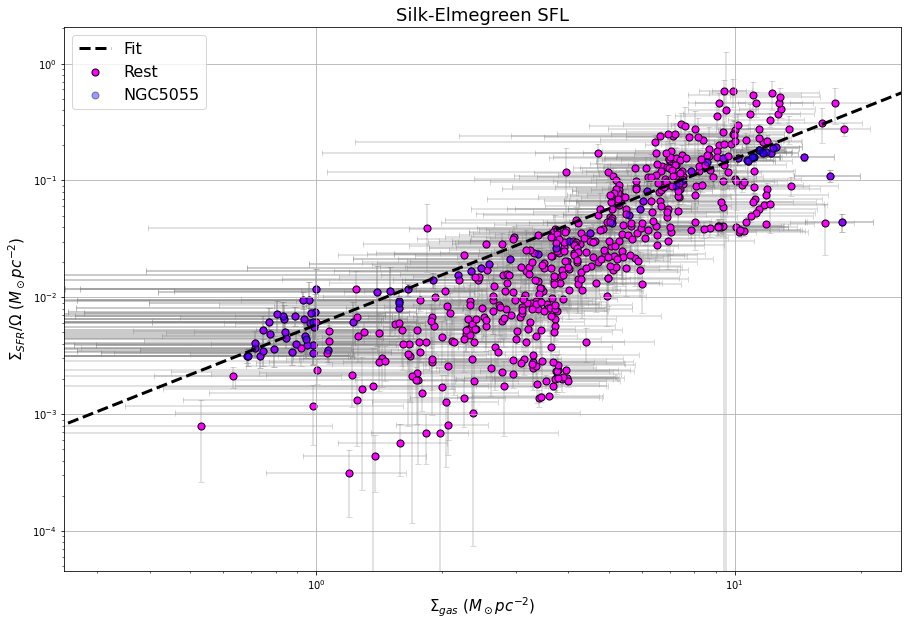

In [8]:
sigma_gas_lin = np.linspace(2e-1, 3e1, 100)

fig = figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.scatter(masked_sigma_gas_sesfl, masked_sigma_sfr_sesfl/masked_omega_sesfl, color="magenta", edgecolor='k', s=50, label="Rest")
frame.errorbar(masked_sigma_gas_sesfl, masked_sigma_sfr_sesfl/masked_omega_sesfl, xerr=masked_sigma_gas_err_sesfl, yerr=masked_sigma_sfr_sesfl/masked_omega_sesfl*np.sqrt((masked_sigma_sfr_err_sesfl/masked_sigma_sfr_sesfl)**2 + (masked_omega_err_sesfl/masked_omega_sesfl)**2), fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3, zorder=0)
frame.plot(sigma_gas_lin, fit_se(sigma_gas_lin, a_sesfl, n_sesfl), color="k", lw=3, ls="dashed", label="Fit")
frame.scatter(NGC5055_sgas, NGC5055_ssfr/NGC5055_omega, color="blue", edgecolor='k', s=50, alpha=0.4, label="NGC5055")
frame.errorbar(NGC5055_sgas, NGC5055_ssfr/NGC5055_omega, xerr=NGC5055_esgas, yerr=NGC5055_ssfr/NGC5055_omega*np.sqrt((NGC5055_essfr/NGC5055_ssfr)**2 + (NGC5055_eomega/NGC5055_omega)**2), fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3, zorder=0)
frame.set_xscale('log')
frame.set_yscale('log')
frame.set_xlim(2.5e-1, 2.5e1)
frame.set_title(r"Silk-Elmegreen SFL", fontsize = 18)
frame.set_xlabel(r"$\Sigma_{gas}$ $(M_\odot pc^{-2})$", fontsize = 15)
frame.set_ylabel(r"$\Sigma_{SFR}/\Omega$ $(M_\odot pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.grid()
show()

In [9]:
log_sgas = np.log10(1.33*masked_sigma_gas_sesfl)
log_esgas = (1/np.log(10))*(masked_sigma_gas_err_sesfl/masked_sigma_gas_sesfl)
log_y = np.log10(masked_sigma_sfr_sesfl/masked_omega_sesfl)
log_ey = (1/np.log(10))*((masked_sigma_sfr_sesfl/masked_omega_sesfl*np.sqrt((masked_sigma_sfr_err_sesfl/masked_sigma_sfr_sesfl)**2 + (masked_omega_err_sesfl/masked_omega_sesfl)**2))/(masked_sigma_sfr_sesfl/masked_omega_sesfl))
#print(log_sgas)

In [10]:
def lin2(x, a, b):
    return a*x + b

popt, pcov = curve_fit(lin2, log_sgas, log_y, sigma=log_ey, p0=[4, -4])
a_2, b_2 = popt
#print(a_2, b_2)
print(f"a = {10**b_2}, n = {a_2}")

a = 0.0008269975089914579, n = 1.8605509220558722


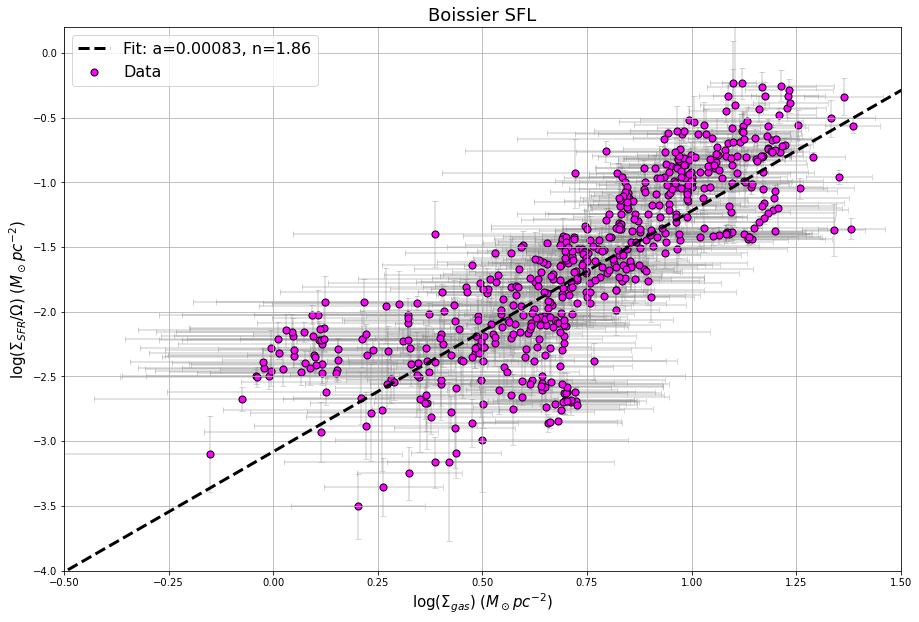

In [11]:
fig = figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.scatter(log_sgas, log_y, color="magenta", edgecolor='k', s=50, label="Data")
frame.errorbar(log_sgas, log_y, xerr=log_esgas, yerr=log_ey, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3, zorder=0)
frame.plot(np.linspace(-1, 2, 50), lin2(np.linspace(-1, 2, 50), a_2, b_2), color="k", lw=3, ls="dashed", label=f"Fit: a={10**b_2:.5f}, n={a_2:.2f}")
#frame.set_xscale('log')
#frame.set_yscale('log')
frame.set_xlim(-0.5, 1.5)
frame.set_ylim(-4, 0.2)
frame.set_title(r"Boissier SFL", fontsize = 18)
frame.set_xlabel(r"log$(\Sigma_{gas})$ $(M_\odot pc^{-2})$", fontsize = 15)
frame.set_ylabel(r"log$(\Sigma_{SFR}/\Omega)$ $(M_\odot pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.grid()
show()

Number of data points: 570
-------------------------
PEARSON'S TEST
Correlation coefficient: 0.8088; p-value 4.662e-133
-------------------------
SPEARMAN'S TEST
Correlation coefficient: 0.8647; p-value 5.03e-172
-------------------------
KENDALL'S TEST
Correlation coefficient: 0.6622; p-value 1.435e-123
-------------------------
Running MCMC with 192 cores. Please wait...
Converged after 3700 iterations in 65 seconds
Mean acceptance fraction: 0.642
-------------------------
Maximum likelihood (ML) value: 234.9
Slope (ML, median, upper error, lower error): 2.785; 2.791; +0.0882, -0.08587
Intercept (ML, median, upper error, lower error): -3.787; -3.792; +0.07608; -0.07882
Intrinsic scatter (ML, median, upper error, lower error): 0.06084; 0.06067; +0.007421; -0.007352
ML observed scatter (vertical): 0.5223
ML observed scatter (orthogonal): 0.1765
*** NB medians and errors only meaningful for unimodal posteriors. Check the corner plot! ***
-------------------------


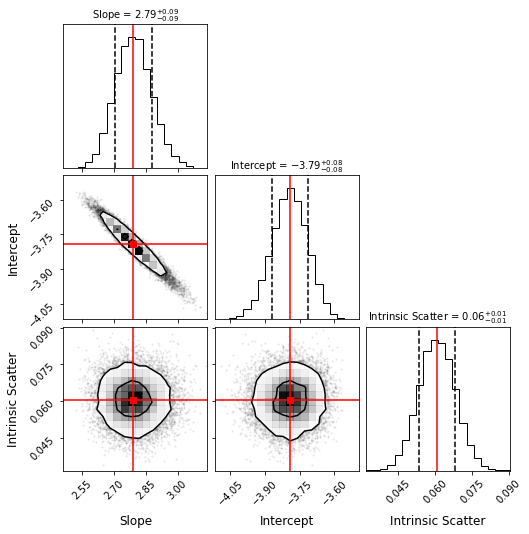

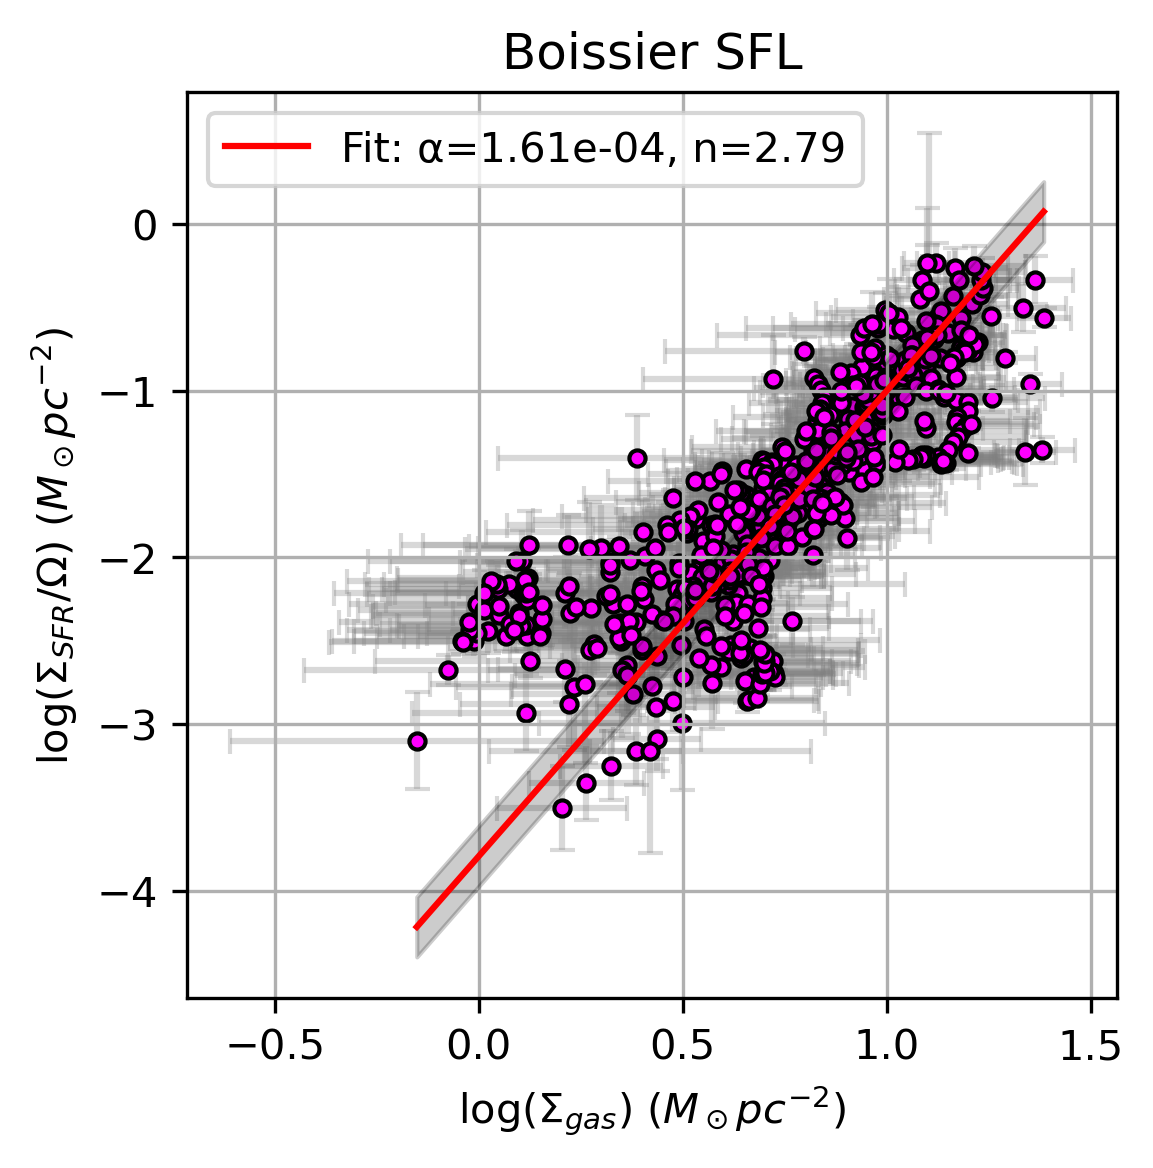

In [12]:
a, b, s, sobs = blf.BayesLineFit(log_sgas, log_y, log_esgas, log_ey, outfile_chain=None, 
                                 outfile_bestfit=None, outplot_convergence=None, plotpdf=False,
                                plot_title="boissier")

# Kennicutt-Schmidt SFL fitting

In [13]:
log_sfr = np.log10(masked_sigma_sfr_sesfl*1e9)
log_esfr = (1/np.log(10))*(masked_sigma_sfr_err_sesfl/masked_sigma_sfr_sesfl)

In [14]:
popt, pcov = curve_fit(lin2, log_sgas, log_sfr, p0=[4, -4])
a_ksl, b_ksl = popt
#print(a_ksl, b_ksl)
print(f"a = {10**b_ksl}, n = {a_ksl}")

a = 0.009827821087808353, n = 2.2626839251629796


Number of data points: 570
-------------------------
PEARSON'S TEST
Correlation coefficient: 0.8065; p-value 9.662e-132
-------------------------
SPEARMAN'S TEST
Correlation coefficient: 0.8418; p-value 3.227e-154
-------------------------
KENDALL'S TEST
Correlation coefficient: 0.6459; p-value 1.165e-117
-------------------------
Running MCMC with 192 cores. Please wait...
Converged after 3600 iterations in 63 seconds
Mean acceptance fraction: 0.643
-------------------------
Maximum likelihood (ML) value: 243.0
Slope (ML, median, upper error, lower error): 3.83; 3.831; +0.1067, -0.1014
Intercept (ML, median, upper error, lower error): -3.281; -3.28; +0.09191; -0.09565
Intrinsic scatter (ML, median, upper error, lower error): 0.03992; 0.03915; +0.009065; -0.01008
ML observed scatter (vertical): 0.7242
ML observed scatter (orthogonal): 0.183
*** NB medians and errors only meaningful for unimodal posteriors. Check the corner plot! ***
-------------------------


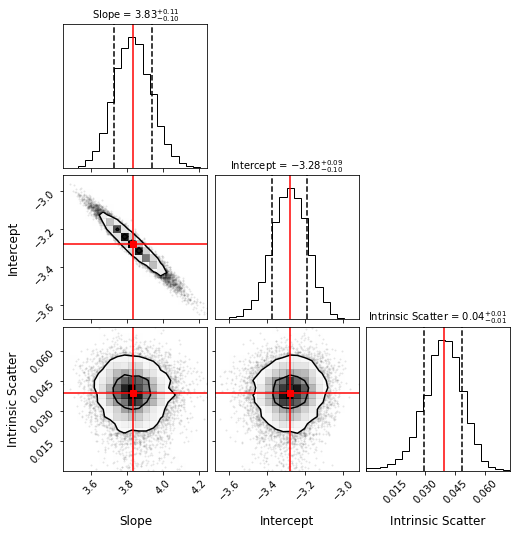

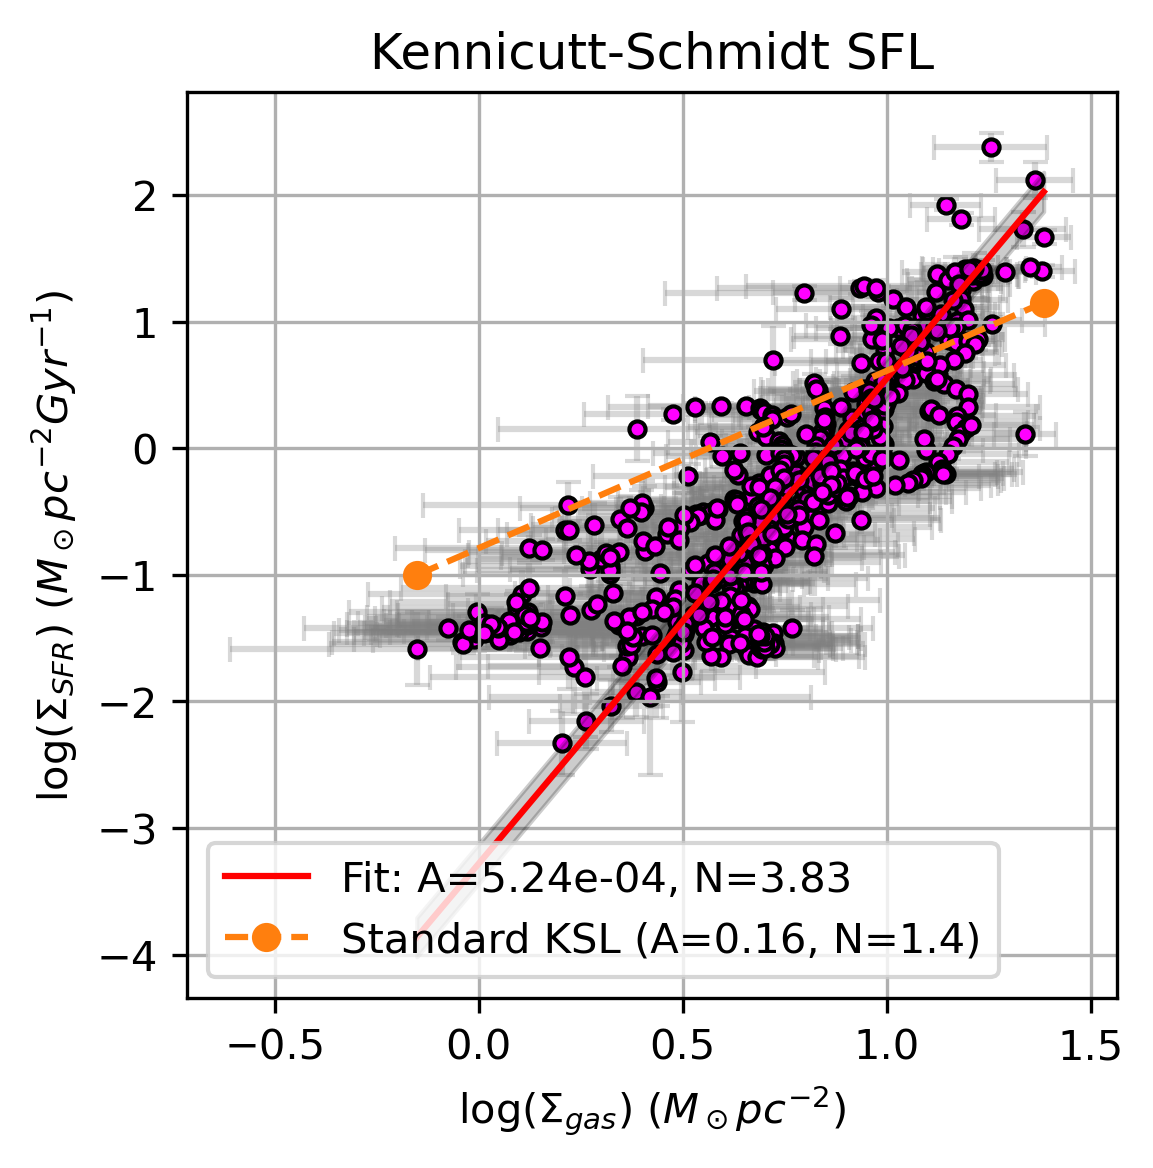

In [15]:
a, b, s, sobs = blf.BayesLineFit(log_sgas, log_sfr, log_esgas, log_esfr, outfile_chain=None, 
                                 outfile_bestfit=None, outplot_convergence=None, plotpdf=False,
                                plot_title="kennicutt")

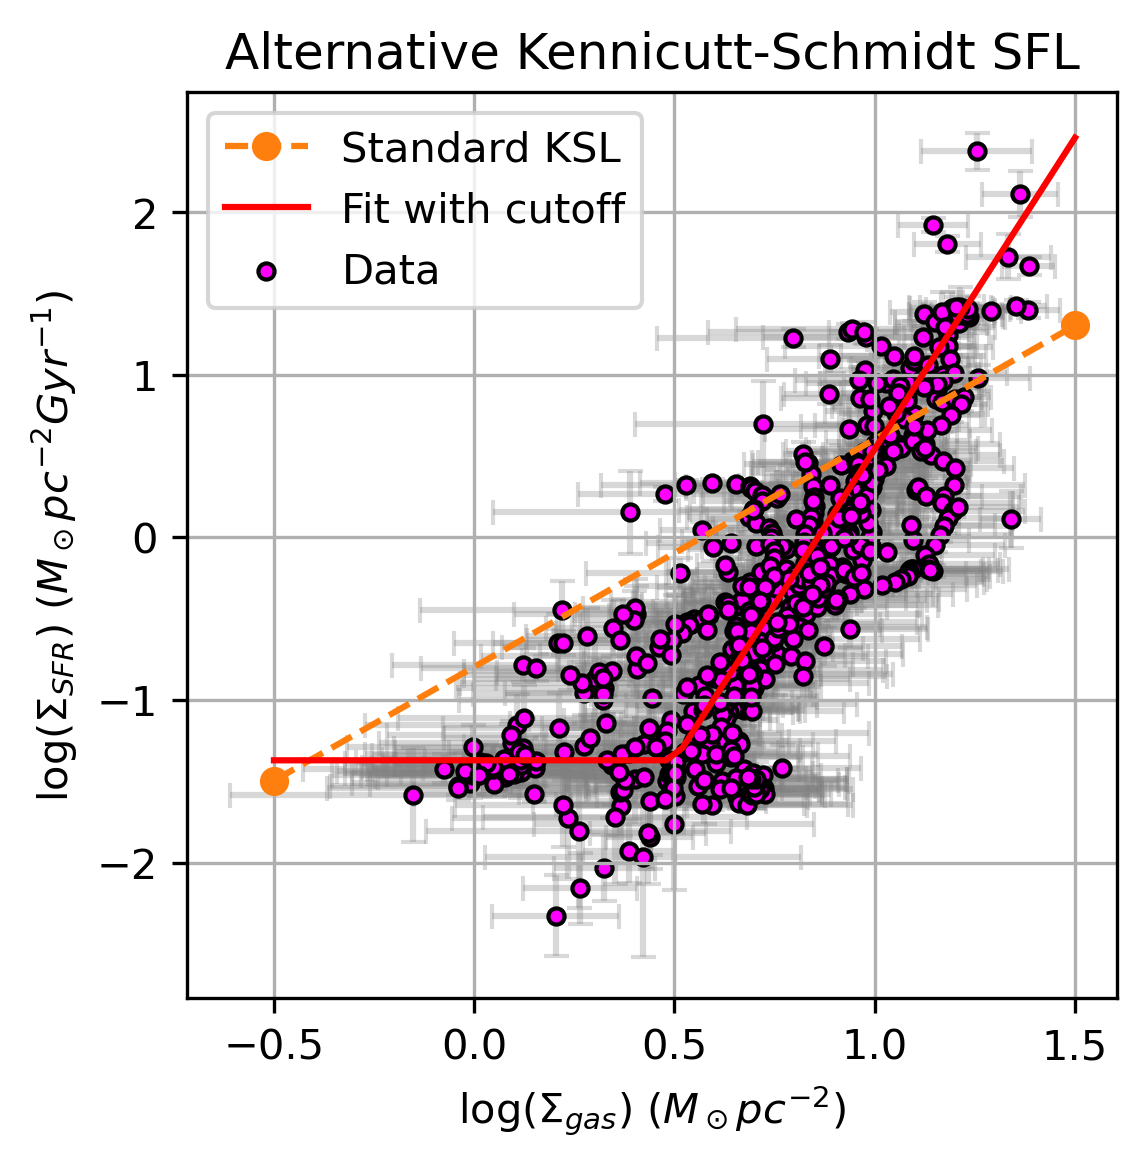

In [34]:
def new_SFL(x, slope, intercept):
    y = slope * x + intercept
    y[x <= 0.5] = slope * 0.5 + intercept  # Apply cutoff for x <= 0.5
    return y

fig = figure(figsize=(4,4), dpi=300, facecolor='w')
frame = fig.add_subplot(1,1,1)
frame.scatter(log_sgas, log_sfr, color="magenta", edgecolor='k', linewidth=1, s=15, zorder=1, label="Data")
frame.errorbar(log_sgas, log_sfr, xerr=log_esgas, yerr=log_esfr, fmt = ' ', ecolor = 'grey', capsize = 3, alpha=0.3, zorder=0)
frame.plot(np.linspace(-0.5, 1.5, 2), lin2(np.linspace(-0.5, 1.5, 2), 1.4, np.log10(0.16)), "--o", zorder=4, label=f"Standard KSL")
frame.plot(np.linspace(-0.5, 1.5, 50), new_SFL(np.linspace(-0.5, 1.5, 50), 3.83, np.log10(5.18e-4)), color="r", zorder=4, label=f"Fit with cutoff")
frame.set_title(r"Alternative Kennicutt-Schmidt SFL")
frame.set_xlabel(r"log$(\Sigma_{gas})$ $(M_\odot pc^{-2})$")
frame.set_ylabel(r"log$(\Sigma_{SFR})$ $(M_\odot pc^{-2} Gyr^{-1})$")
frame.legend()
frame.grid()
show()